#**Exploratory Data Analysis (EDA): Efektivitas Penyaluran Dana Transfer ke Daerah (TKDD) dan Dampaknya pada Indeks Pembangunan Manusia (IPM) Provinsi Indonesia Tahun 2023**

---





**Kompetisi :** TECHFEST Data Analytics Competition 2025

**Tujuan Proyek** : Menelusuri Hubungan antara pagu TKDD, dana yang terealisasi,    dan dampaknya terhadap kualitas hidup masyarakat, serta mengungkap wawasan berharga untuk mendukung pengambilan keputusan dalam kebijakan publik

**Dataset** : [Dataset Lomba Data Analytics TECHFEST 2025](https://docs.google.com/spreadsheets/d/1I-dIvIqh8mg6EbsAMp8U-skobzTw55JTRWBwPH5ber4/edit?hl=id&gid=1493327065#gid=1493327065)

**Anggota Tim** : Azzrial Arfiansyah , Ilham Rizky Ramadhan

**Asal Universitas** : UPN Veteran Jakarta

---



##Pendahuluan dan Pemahaman Masalah

###Latar Belakang Studi Kasus

* Pemerintah pusat setiap tahun mengalokasikan anggaran besar melalui **Transfer ke Daerah dan Dana Desa (TKDD)** untuk mendukung pembangunan nasional.
* Setiap provinsi menerima **pagu**, yaitu batas maksimal dana yang dapat digunakan untuk pembangunan publik seperti jalan, sekolah, dan layanan kesehatan.
* **Tidak semua daerah** mampu menyerap dana secara optimal, ada yang hampir 100%, ada pula yang jauh dari target.
* Studi ini ingin mengevaluasi seberapa efektif dana TKDD yang telah direncanakan benar-benar terealisasi dan apakah **tingkat penyerapan dana berkorelasi dengan kesejahteraan masyarakat**, yang diukur melalui **Indeks Pembangunan Manusia (IPM)**
* Pertanyaan utama : Apakah dana besar menjamin keberhasilan pembangunan? atau ada faktor lain yang lebih menentukan?

###Tujuan Analisis Data

Tujuan analisi data ini adalah :
*   Melakukan eksplorasi mendalam terhadap data yang disediakan, mengidentifikasi pola, anomali, serta hubungan antar variabel.
*   Menyajikan temuan-temuan tersebut secara efektif.
*   Memberikan pemahaman yang lebih baik dan landasan informasi yang dapat mendukung pengambilan keputusan dalam kebijakan publik.

###Rumusan Masalah

Berdasarkan studi kasus, rumusan masalah yang akan dianalisis adalah:
* Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?
* Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?
* Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?
* Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?
* Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

---



##Data Overview

Tahap ini bertujuan untuk memahami struktur, isi, dan karakteristik awal dataset sebelum masuk ke tahap pembersihan dan analisis eksploratif lebih lanjut.

###Import Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Proses analisis data diawali dengan mengimpor pustaka (library) Python yang relevan. `Pandas` digunakan untuk manipulasi dan analisis data tabular, `NumPy` untuk operasi numerik, serta `Matplotlib` dan `Seaborn` untuk visualisasi data yang informatif dan estetis. Selain itu, pustaka `warnings` digunakan untuk menonaktifkan pesan peringatan guna menjaga output tetap bersih dan fokus pada hasil analisis.

###Load Dataset

In [146]:
url = 'https://raw.githubusercontent.com/piyuuu19/Data_Analytics_Techfest/main/Dataset%20Lomba%20Data%20Analytics%20TECHFEST%202025Raw.csv'
df = pd.read_csv(url)

Dataset disimpan pada repositori GitHub untuk memudahkan akses secara kolaboratif dan terpusat. Selanjutnya, data dimuat ke dalam DataFrame menggunakan pustaka Pandas sebagai langkah awal dalam proses eksplorasi dan analisis data lebih lanjut.

###Deskripsi Umum Data

In [147]:
df.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,"74,7","Rp 30.821.480.000.000,00","Rp 31.074.560.000.000,00",5.409.200,"5.744.760,78","14,45","227018,2",41.408.000,"4,23"
1,BALI,"78,01","Rp 11.152.110.000.000,00","Rp 11.064.980.000.000,00",4.374.300,"2.529.543,01","4,25","274358,18",62.294.000,"5,71"
2,BANTEN,"75,77","Rp 17.453.380.000.000,00","Rp 17.467.380.000.000,00",12.167.000,"1.435.635,74","6,17","814122,03",66.147.000,"4,81"
3,BENGKULU,"74,3","Rp 10.570.080.000.000,00","Rp 10.559.790.000.000,00",2.059.400,"5.127.605,13","14,04","96583,09",46.300.000,"4,28"
4,DI YOGYAKARTA,"81,09","Rp 10.355.870.000.000,00","Rp 10.241.290.000.000,00",3.712.600,"2.758.522,33","11,04","180696,04",48.360.000,"5,07"


Tampilan awal dataset menunjukkan bahwa data disusun berdasarkan masing-masing provinsi, dengan sejumlah variabel ekonomi dan demografi sebagai kolom. Nama-nama kolom sudah cukup deskriptif dan mencerminkan isi data, meskipun sebagian menggunakan frasa yang panjang.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Provinsi                                                        38 non-null     object
 1   IPM                                                             34 non-null     object
 2   Pagu TKDD                                                       37 non-null     object
 3   Realisasi TKDD                                                  37 non-null     object
 4   Jumlah Penduduk                                                 36 non-null     object
 5   Anggaran APBN per kapita                                        35 non-null     object
 6   Persentase Penduduk Miskin                                      34 non-null     object
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  

* **Jumlah Entri :** Dataset memiliki 38 entri yang merepresentasikan 38 provinsi di Indonesia.
* **Jumlah Kolom :** Terdapat 10 kolom dalam dataset.
* **Tipe Data:** Semua kolom saat ini bertipe object, termasuk yang seharusnya bertipe data numerik seperti IPM, Pagu TKDD, Realisasi TKDD, Jumlah Penduduk, Anggaran APBN per kapita, Persentase Penduduk Miskin, PDRB Atas Dasar Harga Berlaku, PDRB per Kapita HB, Laju Pertumbuhan PDRB atas dasar konstan 2010. Ini menunjukkan bahwa data belum dikonversi ke tipe numerik.
* **Missing Values:** Beberapa kolom memiliki nilai kurang dari 38, seperti IPM hanya 34, Pagu TKDD dan Realisasi TKDD hanya 37, Jumlah Penduduk hanya 36, Anggaran APBN per kapita hanya 35, dan Persentase Penduduk Miskin hanya 34. Artinya ada **missing values** pada kolom kolom tersebut yang perlu ditangani sebelum analisis lebih lanjut.

In [149]:
df.describe()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
count,38,34,37,37,36,35,34,38,38,38
unique,38,33,37,37,36,35,34,38,38,37
top,ACEH,"73,73","Rp 30.821.480.000.000,00","Rp 31.074.560.000.000,00",5.409.200,"5.744.760,78","14,45","227018,2",41.408.000,"4,23"
freq,1,2,1,1,1,1,1,1,1,2


Hasil eksplorasi awal menunjukkan bahwa sebagian besar kolom masih bertipe `object`, termasuk kolom numerik seperti IPM, Pagu TKDD, dan Persentase Penduduk Miskin. Hal ini terlihat dari output `describe()` yang masih menampilkan `unique`, `top`, dan `freq`, bukan metrik statistik numerik seperti `mean` atau `std`. Langkah selanjutnya adalah melakukan pembersihan dan konversi tipe data untuk mempersiapkan data numerik yang valid sehingga siap dilakukan analisis lebih lanjut.

##Data Cleaning And Preparation

Tahap ini bertujuan untuk membersihkan data dari format yang tidak konsisten, menangani nilai yang hilang, dan mempersiapkan data agar siap untuk dianalisis

### Format Cleaning And Data Type Conversion

In [150]:
df_clean = df.copy()

numeric_cols_to_clean = [
    'IPM', 'Pagu TKDD', 'Realisasi TKDD', 'Jumlah Penduduk',
    'Anggaran APBN per kapita', 'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010'
]

for col in numeric_cols_to_clean:
    if df_clean[col].dtype == 'object':
        # Menghapus 'Rp', spasi, dan titik ribuan
        df_clean[col] = df_clean[col].str.replace(r'[Rp.\s]', '', regex=True)
        # Mengganti koma desimal dengan titik
        df_clean[col] = df_clean[col].str.replace(',', '.', regex=False)
    # Konversi ke numerik, error diubah menjadi NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Mengonversi PDRB dari Miliar Rupiah ke Rupiah
df_clean['Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku'] *= 1_000_000_000

# Mengonversi Jumlah Penduduk ke tipe Integer agar tidak ada desimal
df_clean['Jumlah Penduduk'] = df_clean['Jumlah Penduduk'].astype('Int64')

print("Tipe data setelah dibersihkan:")
df_clean.info()

Tipe data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Pagu TKDD                                                       37 non-null     float64
 3   Realisasi TKDD                                                  37 non-null     float64
 4   Jumlah Penduduk                                                 36 non-null     Int64  
 5   Anggaran APBN per kapita                                        35 non-null     float64
 6   Persentase Penduduk Miskin                                      34 non-null     float64
 7   Produk Domestik Regional

* Kolom-kolom numerik dibersihkan dari karakter non-numerik seperti 'Rp', titik pemisah ribuan (.), dan spasi.
* Koma desimal (',') dikonversi menjadi titik ('.') untuk menyesuaikan dengan format numerik standar Python.
* Nilai kemudian dikonversi ke tipe numerik (float atau Int64), dengan penanganan error yang menghasilkan NaN jika terdapat format tidak valid.
* Kolom PDRB Atas Dasar Harga Berlaku disesuaikan skalanya menjadi dalam satuan rupiah penuh (dikalikan 1 miliar) agar konsisten dengan kolom lain yang juga menggunakan satuan rupiah.
* Kolom Jumlah Penduduk dikonversi menjadi tipe Int64 untuk merepresentasikan jumlah populasi secara lebih tepat tanpa angka desimal.

In [151]:
df_clean.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,"30,821,480,000,000.00","31,074,560,000,000.00",5409200,"5,744,760.78",14.45,"227,018,200,000,000.00",41408000,4.23
1,BALI,78.01,"11,152,110,000,000.00","11,064,980,000,000.00",4374300,"2,529,543.01",4.25,"274,358,180,000,000.00",62294000,5.71
2,BANTEN,75.77,"17,453,380,000,000.00","17,467,380,000,000.00",12167000,"1,435,635.74",6.17,"814,122,030,000,000.00",66147000,4.81
3,BENGKULU,74.30,"10,570,080,000,000.00","10,559,790,000,000.00",2059400,"5,127,605.13",14.04,"96,583,090,000,000.00",46300000,4.28
4,DI YOGYAKARTA,81.09,"10,355,870,000,000.00","10,241,290,000,000.00",3712600,"2,758,522.33",11.04,"180,696,040,000,000.00",48360000,5.07


Tampilan awal (head()) dari df_clean menunjukkan bahwa seluruh kolom numerik kini telah dalam format numerik yang sesuai (float64 atau Int64).Semua Kolom telah dikonversi dan diskalakan dengan benar. Nilai-nilai seperti Jumlah Penduduk kini ditampilkan sebagai bilangan bulat tanpa desimal, sementara kolom-kolom seperti Pagu TKDD, Realisasi TKDD, dan PDRB berada dalam satuan rupiah penuh sesuai dengan pembersihan format dan konversi tipe data sebelumnya.

###Misiing Values Treatment

In [152]:
# Verifikasi kembali jumlah missing values setelah tahap pembersihan data
print("Jumlah Missing Values Sebelum Analisis:")
print(df_clean.isnull().sum())

# Menampilkan baris data yang memiliki nilai kosong untuk dianalisis
print("\nBaris dengan Data Kosong:")
display(df_clean[df_clean.isnull().any(axis=1)])

Jumlah Missing Values Sebelum Analisis:
Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

Baris dengan Data Kosong:


,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
25,PAPUA BARAT DAYA,NaN,"10,163,480,000,000.00","10,132,040,000,000.00",6113520,"1,657,316.90",NaN,"36,104,570,000,000.00",58450000,1.82
26,PAPUA PEGUNUNGAN,NaN,"13,543,140,000,000.00","12,821,760,000,000.00",<NA>,NaN,NaN,"24,433,990,000,000.00",16870000,4.78
27,PAPUA SELATAN,NaN,"8,094,830,000,000.00","7,658,020,000,000.00",<NA>,NaN,NaN,"31,357,750,000,000.00",58677000,4.23
28,PAPUA TENGAH,NaN,"14,395,230,000,000.00","14,941,270,000,000.00",1351659,"11,054,023.24",NaN,"150,377,180,000,000.00",103508000,5.95
34,SULAWESI UTARA,75.04,NaN,NaN,2660800,NaN,7.38,"171,969,420,000,000.00",64131000,5.48


Setelah dilakukan proses pembersihan data, masih terdapat beberapa nilai kosong pada variabel seperti IPM, Pagu TKDD, Realisasi TKDD, Jumlah Penduduk, dan Anggaran APBN per kapita. Nilai kosong ini dibiarkan apa adanya tanpa diimputasi atau dihapus, dengan pertimbangan bahwa data bersumber dari kondisi riil dan mencerminkan ketidaksediaan informasi pada beberapa daerah, termasuk wilayah otonomi baru. Ketiadaan data pada beberapa indikator adalah kondisi yang wajar dan mencerminkan realitas di lapangan. Melakukan imputasi dikhawatirkan akan mengurangi keaslian dan validitas analisis,Menghapus baris-baris ini juga tidak ideal karena akan menghilangkan informasi penting mengenai PDRB dan alokasi TKDD untuk provinsi tersebut, sehingga menjaga nilai kosong dianggap lebih representatif terhadap realitas data.

###Handling Data Duplication

In [153]:
print(f"Jumlah baris duplikat: {df_clean.duplicated().sum()}")

Jumlah baris duplikat: 0


Tidak ditemukan baris data yang duplikat, sehingga tidak diperlukan tindakan lebih lanjut.

###Outlier Detection & Treatment

Laporan Outlier per Kolom:


Kolom 'IPM':
  - Jumlah Outlier: 6
  - Provinsi Outlier: ['DI YOGYAKARTA', 'DKI JAKARTA', 'KEP. RIAU', 'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT']

Kolom 'Pagu TKDD':
  - Jumlah Outlier: 3
  - Provinsi Outlier: ['JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR']

Kolom 'Realisasi TKDD':
  - Jumlah Outlier: 4
  - Provinsi Outlier: ['JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN TIMUR']

Kolom 'Jumlah Penduduk':
  - Jumlah Outlier: 5
  - Provinsi Outlier: ['JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN']

Kolom 'Anggaran APBN per kapita':
  - Jumlah Outlier: 3
  - Provinsi Outlier: ['KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'PAPUA BARAT']

Kolom 'Persentase Penduduk Miskin':
  - Jumlah Outlier: 1
  - Provinsi Outlier: ['PAPUA']

Kolom 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku':
  - Jumlah Outlier: 4
  - Provinsi Outlier: ['DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR']

Kolom 'Produk Domesti

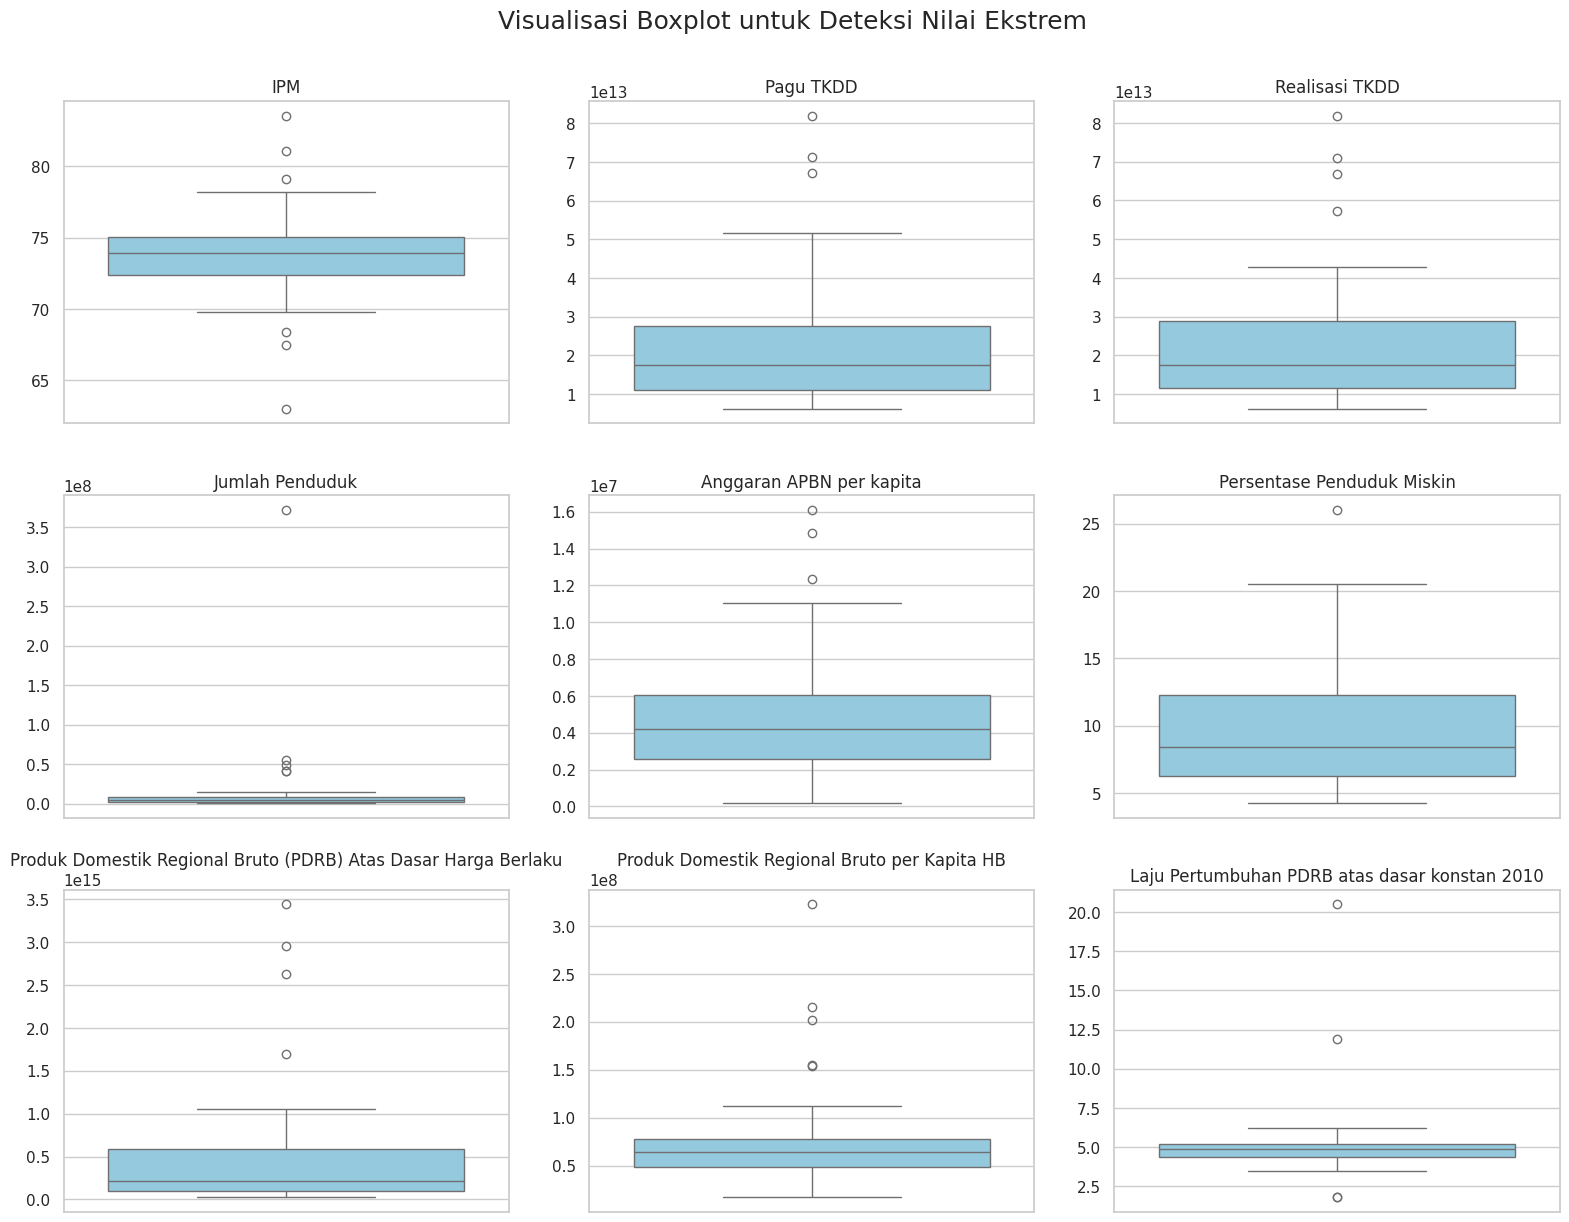

In [154]:
# Mengambil semua kolom numerik
numeric_cols = df_clean.select_dtypes(include=['float', 'int64', 'Int64']).columns

def detect_outliers_iqr_revised(df, columns):
    outlier_summary = {}

    for col in columns:
        # Menghitung kuartil dan IQR, .quantile() otomatis mengabaikan NaN
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Bound = Q1 - 1.5 * IQR
        Upper_Bound = Q3 + 1.5 * IQR

        # Mengidentifikasi outliers
        outliers = df[(df[col] < Lower_Bound) | (df[col] > Upper_Bound)]
        outlier_count = outliers.shape[0]

        outlier_summary[col] = {
            'Outlier Count': outlier_count,
            'Outlier Provinces': outliers['Provinsi'].tolist(),
            'Lower Bound': Lower_Bound,
            'Upper Bound': Upper_Bound
        }
    return outlier_summary

def plot_outliers(df, columns, figsize=(16, 12)):
    num_plots = len(columns)
    rows = (num_plots + 2) // 3

    plt.figure(figsize=figsize)
    for i, col in enumerate(columns, 1):
        plt.subplot(rows, 3, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'{col}')
        plt.ylabel('')
        plt.tight_layout(pad=2.0)

    plt.suptitle('Visualisasi Boxplot untuk Deteksi Nilai Ekstrem', fontsize=18, y=1.03)
    plt.show()

# Deteksi outlier dengan fungsi yang sudah direvisi
outlier_report = detect_outliers_iqr_revised(df_clean, numeric_cols)

# Tampilkan laporan outlier yang lebih informatif
print("Laporan Outlier per Kolom:\n")
for col, info in outlier_report.items():
    if info['Outlier Count'] > 0:
        print(f"\nKolom '{col}':")
        print(f"  - Jumlah Outlier: {info['Outlier Count']}")
        print(f"  - Provinsi Outlier: {info['Outlier Provinces']}")
    else:
        # Cetak juga kolom yang tidak punya outlier untuk kelengkapan
        print(f"\nKolom '{col}':\n  - Tidak ada outlier terdeteksi.")

# Visualisasi boxplot
plot_outliers(df_clean, numeric_cols)

* Deteksi outlier dilakukan untuk mengidentifikasi data yang secara signifikan berbeda dari sebagian besar data lainnya. Metode yang digunakan adalah Interquartile Range (IQR). Outlier adalah data yang berada di luar rentang Q1 - 1.5*IQR dan Q3 + 1.5*IQR.
* Berdasarkan visualisasi boxplot, teridentifikasi adanya beberapa outlier pada kolom-kolom seperti PDRB, Jumlah Penduduk, dan Realisasi TKDD. Nilai-nilai ekstrem ini umumnya merepresentasikan provinsi dengan karakteristik ekonomi dan demografi yang unik, seperti DKI Jakarta dengan PDRB yang sangat tinggi atau Jawa Barat dengan jumlah penduduk yang masif.
* Menghapus atau mengubah outlier ini akan menghilangkan informasi penting dan tidak merepresentasikan kondisi sosio-ekonomi Indonesia yang sesungguhnya. Oleh karena itu, outlier akan tetap dipertahankan. Namun, keberadaan mereka akan menjadi pertimbangan utama dalam interpretasi hasil analisis agar tidak menghasilkan kesimpulan yang bias.

###Feature Engineering

In [155]:
# Menghitung Persentase Realisasi TKDD
df_clean['Persentase Realisasi'] = df_clean['Realisasi TKDD'].div(df_clean['Pagu TKDD']) * 100

# Mengklasifikasikan Persentase Realisasi (dengan penanganan data kosong)
def kategori_realisasi(persen):
    #Cek dulu apakah datanya kosong (NaN)
    if pd.isnull(persen):
        return 'Data Tidak Tersedia'
    elif persen < 90:
        return 'Di Bawah 90%'
    elif 90 <= persen <= 100:
        return '90% - 100%'
    else: # Di atas 100%
        return 'Di Atas 100%'

df_clean['Kategori Realisasi'] = df_clean['Persentase Realisasi'].apply(kategori_realisasi)
df_clean.head()

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi,Kategori Realisasi
0,ACEH,74.70,"30,821,480,000,000.00","31,074,560,000,000.00",5409200,"5,744,760.78",14.45,"227,018,200,000,000.00",41408000,4.23,100.82,Di Atas 100%
1,BALI,78.01,"11,152,110,000,000.00","11,064,980,000,000.00",4374300,"2,529,543.01",4.25,"274,358,180,000,000.00",62294000,5.71,99.22,90% - 100%
2,BANTEN,75.77,"17,453,380,000,000.00","17,467,380,000,000.00",12167000,"1,435,635.74",6.17,"814,122,030,000,000.00",66147000,4.81,100.08,Di Atas 100%
3,BENGKULU,74.30,"10,570,080,000,000.00","10,559,790,000,000.00",2059400,"5,127,605.13",14.04,"96,583,090,000,000.00",46300000,4.28,99.90,90% - 100%
4,DI YOGYAKARTA,81.09,"10,355,870,000,000.00","10,241,290,000,000.00",3712600,"2,758,522.33",11.04,"180,696,040,000,000.00",48360000,5.07,98.89,90% - 100%


Pada tahap ini, dilakukan rekayasa fitur (feature engineering) untuk memperkaya data dengan informasi baru yang lebih informatif dan siap dianalisis. Dua fitur baru yang ditambahkan.
- Persentase Realisasi.
Fitur ini menghitung sejauh mana dana Transfer ke Daerah dan Dana Desa (TKDD) telah terealisasi di masing-masing provinsi
- Kategori Realisasi TKDD.
Fitur ini mengelompokkan nilai persentase realisasi ke dalam tiga kategori yang bersifat deskriptif. Tujuan pengelompokan ini adalah untuk menyederhanakan interpretasi dan memungkinkan visualisasi atau analisis kategorikal yang lebih informatif.

##Exploratory Data Analysis (EDA) & Visualization

Pada tahap ini, kita akan melakukan analisis eksploratif untuk memahami distribusi data, mengidentifikasi pola, dan menemukan hubungan antar variabel.

###Univariate Analysis

**Ringkasan Statistik Deskriptif**

In [156]:
statistical_summary = df_clean.describe()

# Fungsi format berdasarkan nilai
def smart_format(x):
    if pd.isna(x):
        return ''
    elif float(x).is_integer():
        return f"{int(x):,}"
    else:
        return f"{x:,.2f}"

# Terapkan ke semua elemen
formatted_summary = statistical_summary.applymap(smart_format)

# Tampilkan hasil
display(formatted_summary)

,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Persentase Realisasi
count,34,37,37,36,35,34,38,38,38,37
mean,73.77,"23,440,450,540,540.54","23,807,038,918,918.92","19,460,766.08","5,120,715.95",10.09,"540,308,035,000,000","79,566,500",5.27,101.11
std,3.76,"18,233,562,971,001.36","18,528,256,334,316.90","62,005,524.28","3,966,608.99",5.18,"818,234,930,480,863.62","59,738,294.97",2.92,3.72
min,63.01,"6,172,420,000,000","6,155,410,000,000","720,100","179,589.41",4.25,"24,433,990,000,000","16,870,000",1.80,94.32
25%,72.40,"11,152,110,000,000","11,518,350,000,000","2,105,975","2,564,899.05",6.24,"98,069,010,000,000","48,233,250",4.40,99.45
50%,73.91,"17,453,380,000,000","17,467,380,000,000","4,402,000","4,225,660.57",8.43,"217,900,775,000,000","63,921,000",4.89,100.02
75%,75.02,"27,690,230,000,000","28,862,210,000,000","8,800,500","6,051,468.56",12.25,"584,089,162,500,000","77,359,000",5.17,101.86
max,83.55,"82,008,300,000,000","81,921,890,000,000","371,804,000","16,099,527.84",26.03,"3,443,026,230,000,000","322,619,000",20.49,110.98


Sebelum melakukan analisis lebih lanjut, dilakukan eksplorasi awal terhadap data untuk memahami karakteristik umum dari masing-masing variabel.

* **IPM (Indeks Pembangunan Manusia)** memiliki nilai rata-rata sebesar 73,77 dengan rentang antara 63,01 hingga 83,55. Hal ini menunjukkan adanya disparitas pembangunan manusia antar provinsi.
* **Pagu dan Realisasi TKDD** menunjukkan nilai yang sangat besar dan bervariasi, mencerminkan perbedaan signifikan dalam alokasi dan penyerapan anggaran antar provinsi.
* **Jumlah Penduduk** berkisar dari sekitar 720 ribu hingga lebih dari 371 juta jiwa, menandakan adanya ketimpangan populasi yang cukup ekstrem antar provinsi.
* **Anggaran APBN per Kapita dan PDRB per Kapita** juga menunjukkan variasi yang tinggi, mengindikasikan ketimpangan dalam distribusi sumber daya dan tingkat kemakmuran.
* **Persentase Penduduk Miskin** memiliki nilai minimum 4,25% dan maksimum 26,03%, yang memperkuat indikasi adanya ketimpangan kesejahteraan antar provinsi.
* PDRB atas dasar harga berlaku sangat bervariasi, dari Rp24 triliun hingga lebih dari Rp3.400 triliun, mencerminkan perbedaan besar dalam skala ekonomi regional.
* **Laju pertumbuhan ekonomi** (berdasarkan harga konstan 2010) rata-rata 5,27%, namun ada provinsi dengan pertumbuhan sangat tinggi (20,49%) dan sangat rendah (1,80%).
* **Persentase realisasi** umumnya tinggi, dengan beberapa provinsi bahkan melebihi 100%, menandakan efektivitas penyerapan anggaran yang relatif baik.

**Segmentasi Realisasi Anggaran**

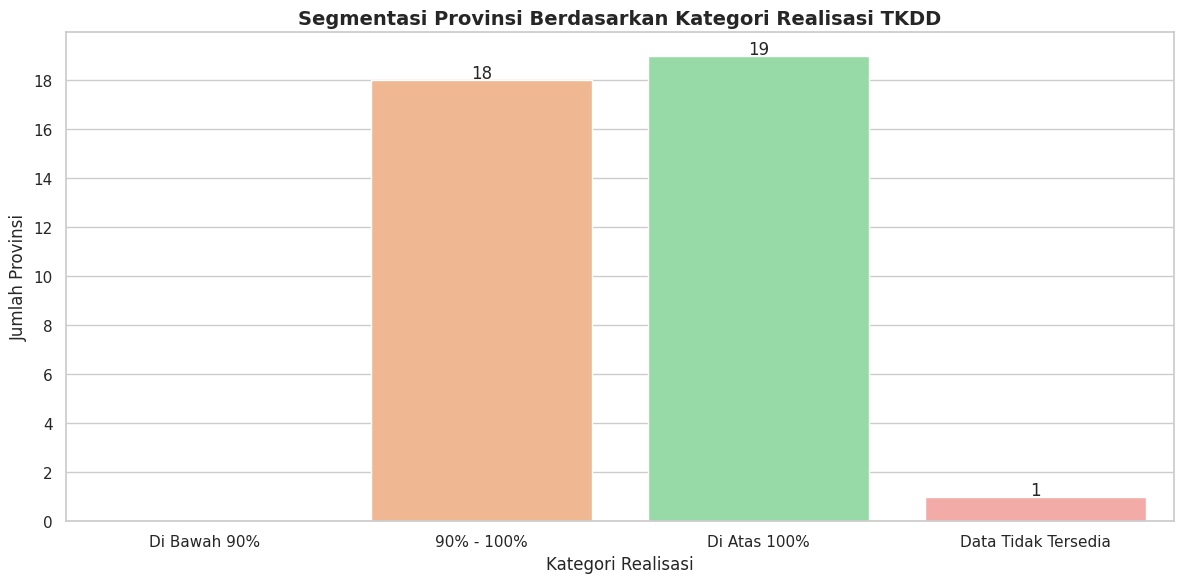

In [157]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='Kategori Realisasi',
    data=df_clean,
    palette='pastel',
    order=['Di Bawah 90%', '90% - 100%', 'Di Atas 100%', 'Data Tidak Tersedia']
)
plt.title('Segmentasi Provinsi Berdasarkan Kategori Realisasi TKDD', fontweight='bold', fontsize=14)
plt.xlabel('Kategori Realisasi', fontsize=12)
plt.ylabel('Jumlah Provinsi', fontsize=12)

# Atur sumbu Y untuk menampilkan hanya bilangan bulat
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Tambahkan label angka di atas bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5), textcoords='offset points'
    )

plt.tight_layout()
plt.show()

Grafik ini mengelompokkan provinsi berdasarkan persentase realisasi Transfer ke Daerah dan Dana Desa (TKDD):
- 19 provinsi memiliki realisasi di atas 100%, menandakan penyerapan anggaran yang sangat tinggi, bahkan melebihi pagu.
- 18 provinsi berada pada kisaran 90%–100%, mencerminkan kinerja penyerapan yang optimal.
- 1 provinsi tidak memiliki data realisasi TKDD yaitu Sulawesi Utara.
- Tidak ada provinsi dengan realisasi di bawah 90%, yang menunjukkan bahwa secara umum, tingkat penyerapan anggaran di seluruh provinsi tergolong baik.


**Profil Distribusi Indikator Utama**

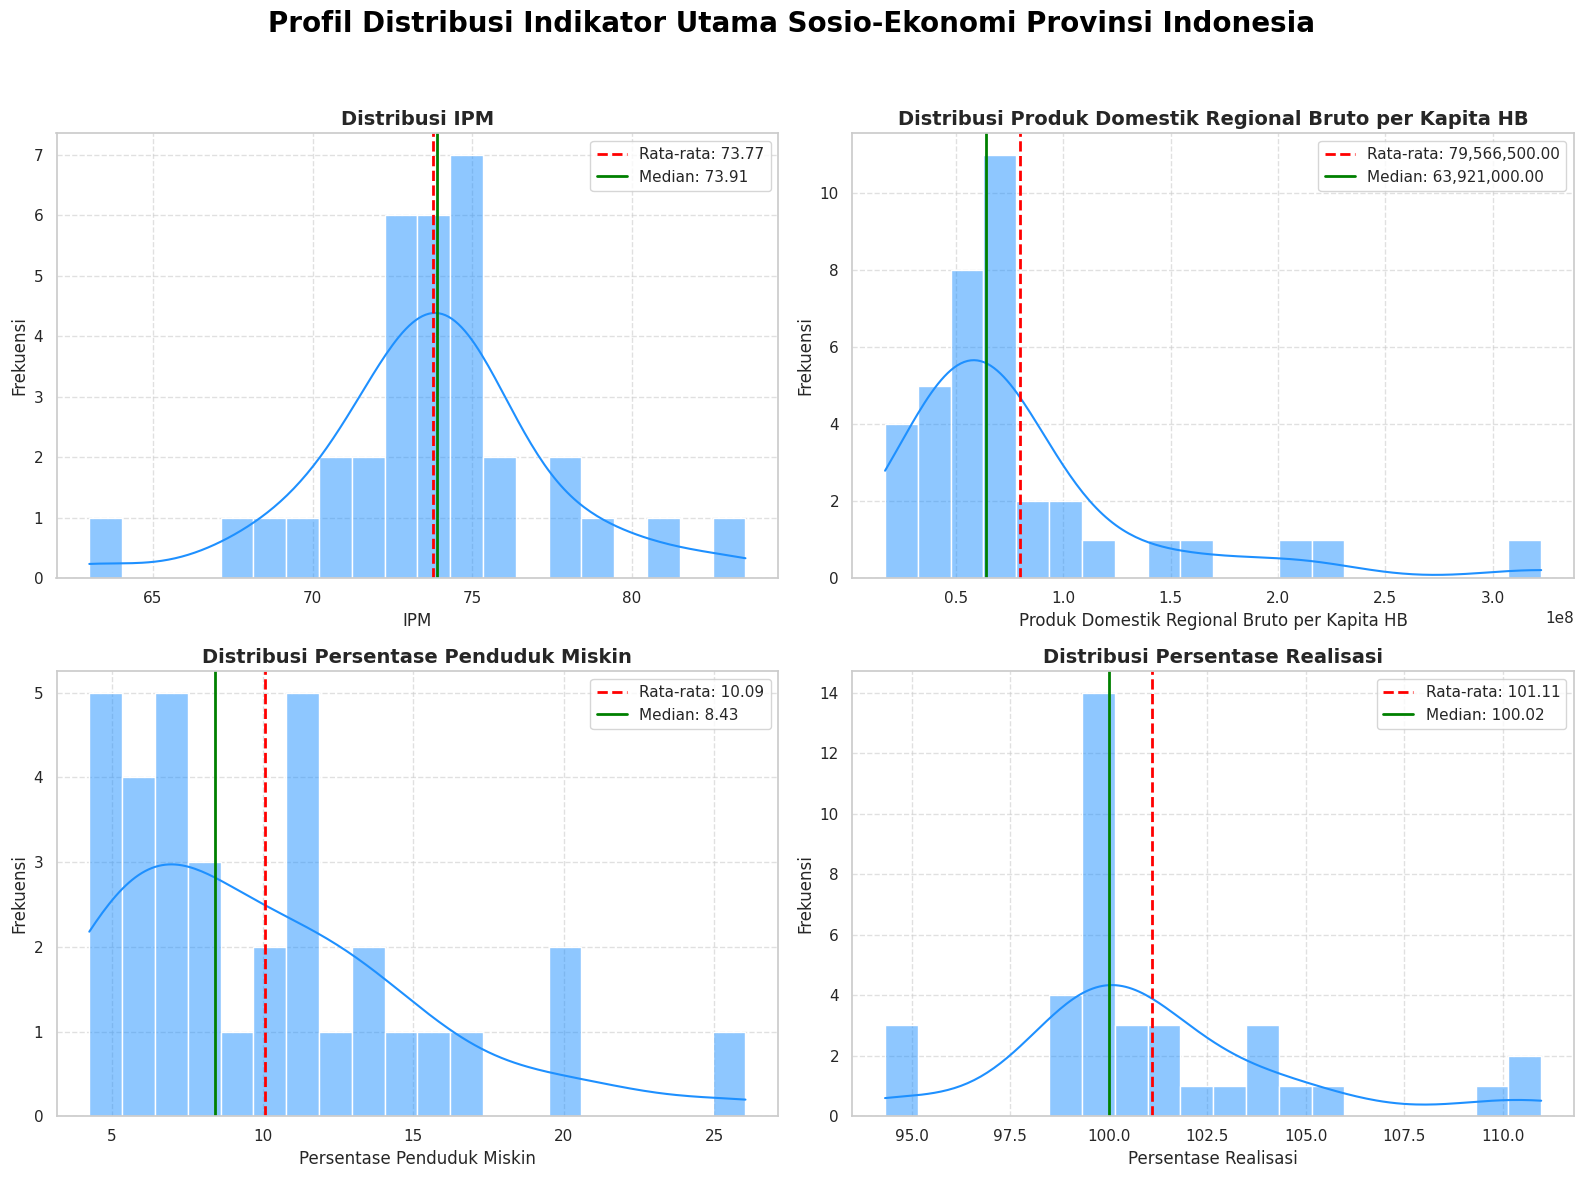

In [158]:
# Kolom numerik yang ingin dianalisis distribusinya
cols_to_plot = [
    'IPM',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Persentase Penduduk Miskin',
    'Persentase Realisasi'
]

# Membuat subplot 2 baris x 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Judul utama
fig.suptitle('Profil Distribusi Indikator Utama Sosio-Ekonomi Provinsi Indonesia',
             fontsize=20, fontweight='bold', color='black')

# Plot histogram + KDE + garis rata-rata & median
for i, col in enumerate(cols_to_plot):
    # Mengabaikan NaN untuk plot dan kalkulasi
    data_series = df_clean[col].dropna()
    sns.histplot(data_series, kde=True, ax=axes[i], bins=20, color='dodgerblue')

    # Rata-rata
    mean_val = data_series.mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                    label=f'Rata-rata: {mean_val:,.2f}')

    # Median
    median_val = data_series.median()
    axes[i].axvline(median_val, color='green', linestyle='-', linewidth=2,
                    label=f'Median: {median_val:,.2f}')

    # Pengaturan masing-masing plot
    axes[i].set_title(f'Distribusi {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frekuensi', fontsize=12)
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Layout rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Empat histogram berikut menggambarkan distribusi dari masing-masing indikator utama.
1. **IPM (Indeks Pembangunan Manusia)**
- Distribusi relatif simetris, dengan mean (73,77) dan median (73,91) yang sangat dekat.
- Menunjukkan bahwa sebagian besar provinsi memiliki IPM di sekitar nilai tengah, dengan sedikit outlier di kedua sisi.
2. **PDRB per Kapita (Harga Berlaku)**
- Distribusi miring ke kanan (right-skewed), dengan mean jauh lebih tinggi (Rp79,6 juta) dibanding median (Rp63,9 juta).
- Artinya, ada beberapa provinsi dengan PDRB per kapita sangat tinggi yang menarik rata-rata ke atas.
3. **Persentase Penduduk Miskin**
- Distribusi juga miring ke kanan, dengan mayoritas provinsi memiliki tingkat kemiskinan di bawah rata-rata nasional (10,09%).
- Median lebih rendah (8,43%), menunjukkan bahwa sebagian besar provinsi memiliki tingkat kemiskinan yang relatif rendah, namun ada beberapa dengan angka sangat tinggi.
4. **Persentase Realisasi TKDD**
- Distribusi cukup simetris, dengan mean (101,11%) dan median (100,02%) yang berdekatan.
- Menunjukkan bahwa sebagian besar provinsi memiliki tingkat realisasi anggaran yang mendekati atau sedikit melebihi 100%.

IPM dan realisasi anggaran relatif merata antar provinsi. PDRB per kapita dan kemiskinan menunjukkan ketimpangan yang lebih besar, dengan beberapa provinsi menjadi outlier ekstrem.

###Bivariate Analysis

**Perbandingan Pagu & Realisasi TKDD**

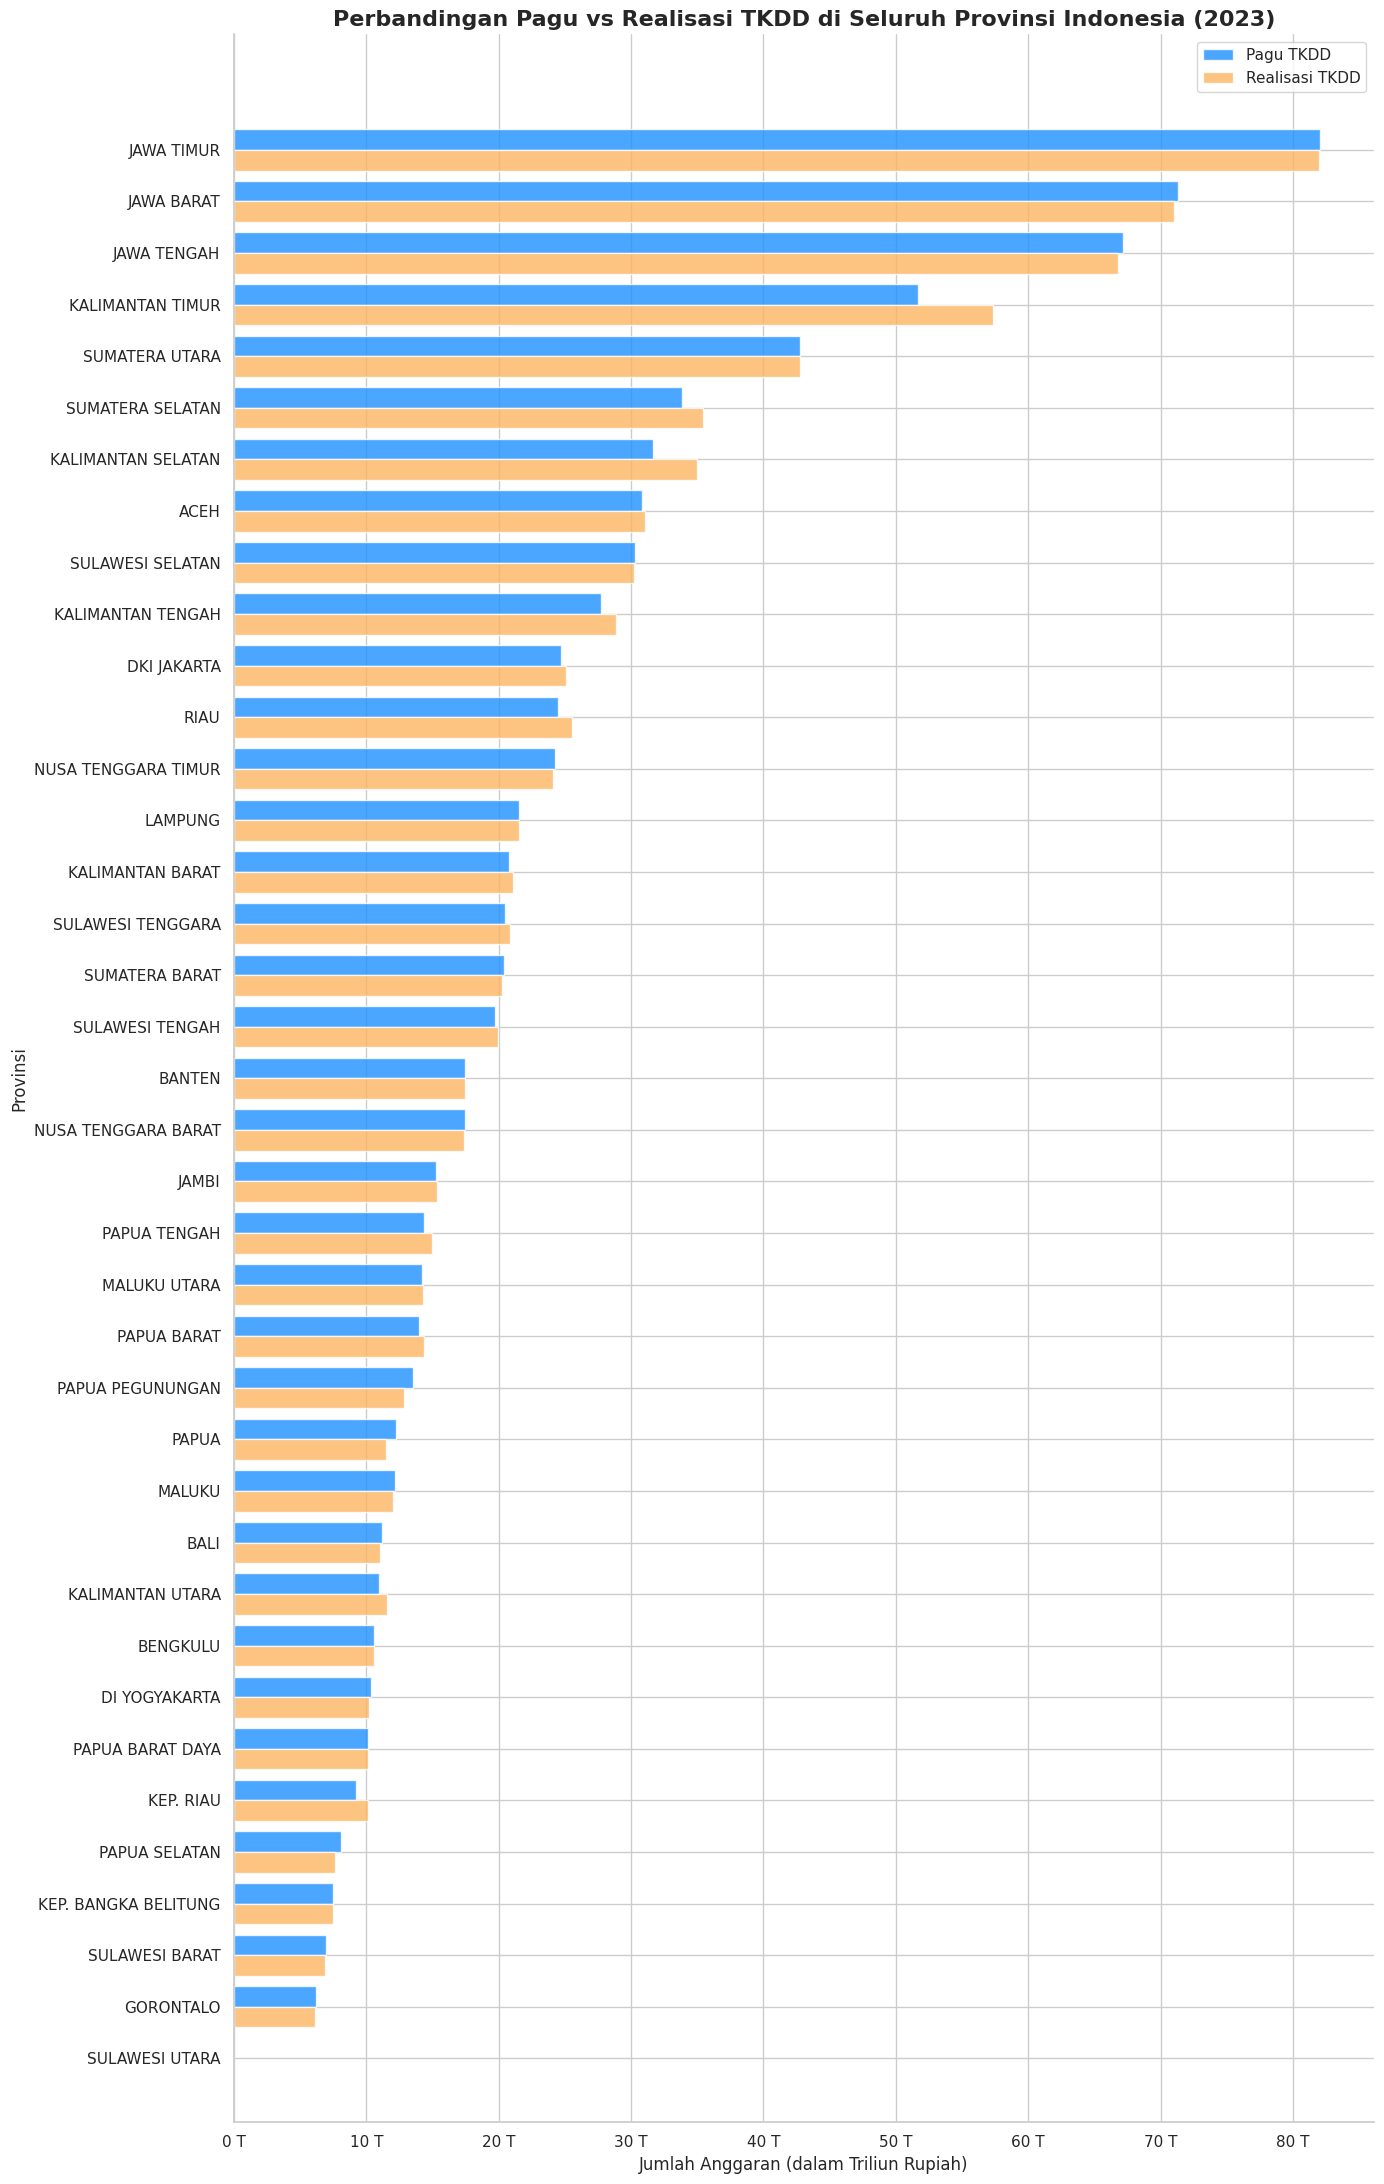

In [159]:
# Persiapan data
df_sorted_all = df_clean.sort_values('Pagu TKDD', ascending=False)

# Membuat visualisasi dengan ukuran yang lebih tinggi
fig, ax = plt.subplots(figsize=(14, 22))

# Posisi untuk setiap bar
bar_width = 0.4
index = np.arange(len(df_sorted_all))

# Membuat bar untuk Pagu dan Realisasi
bar1 = ax.barh(index, df_sorted_all['Pagu TKDD'], bar_width, label='Pagu TKDD', color='dodgerblue', alpha=0.8)
bar2 = ax.barh(index + bar_width, df_sorted_all['Realisasi TKDD'], bar_width, label='Realisasi TKDD', color='#FDB462', alpha=0.8)

# Pelabelan dan Judul
ax.set_ylabel('Provinsi', fontsize=12)
ax.set_xlabel('Jumlah Anggaran (dalam Triliun Rupiah)', fontsize=12)
ax.set_title('Perbandingan Pagu vs Realisasi TKDD di Seluruh Provinsi Indonesia (2023)', fontsize=16, fontweight='bold')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(df_sorted_all['Provinsi'])
ax.invert_yaxis()
ax.legend()

# Fungsi untuk memformat sumbu-x agar menampilkan dalam Triliun (T)
def to_trillions(x, pos):
    'Fungsi ini mengubah angka besar menjadi format Triliun'
    return f'{x / 1e12:.0f} T'

formatter = plt.FuncFormatter(to_trillions)
ax.xaxis.set_major_formatter(formatter)

# Menghilangkan border yang tidak perlu untuk estetika
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

Grafik batang ini membandingkan alokasi anggaran (Pagu TKDD) dan realisasi anggaran (Realisasi TKDD) di seluruh provinsi Indonesia pada tahun 2023.

- Sebagian besar provinsi menunjukkan realisasi yang mendekati atau sedikit melebihi pagu, mencerminkan efisiensi penyerapan anggaran.
- Jawa Timur, Jawa Barat, dan Jawa Tengah menerima alokasi terbesar, namun tetap menunjukkan realisasi yang proporsional.
- Beberapa provinsi seperti Papua dan Papua Pegunungan memiliki realisasi yang lebih rendah dibanding pagu, mengindikasikan potensi hambatan dalam penyaluran atau pelaksanaan anggaran.
- Provinsi dengan pagu kecil seperti Sulawesi Barat dan Gorontalo, tetap menunjukkan realisasi yang cukup baik, meskipun skalanya kecil.
- Provinsi Sulawesi Utara datanya tidak tersedia. Alasan ditampilkan pada grafik bertujuan untuk menunjukkan keseluruhan provinsi dan transparasi data

Perbandingan ini memperkuat temuan univariat sebelumnya bahwa tingkat realisasi TKDD secara umum tinggi, namun efektivitasnya tetap perlu ditinjau dalam konteks kebutuhan dan kapasitas daerah.

**Tingkat Realisasi TKDD Setiap Provinsi**

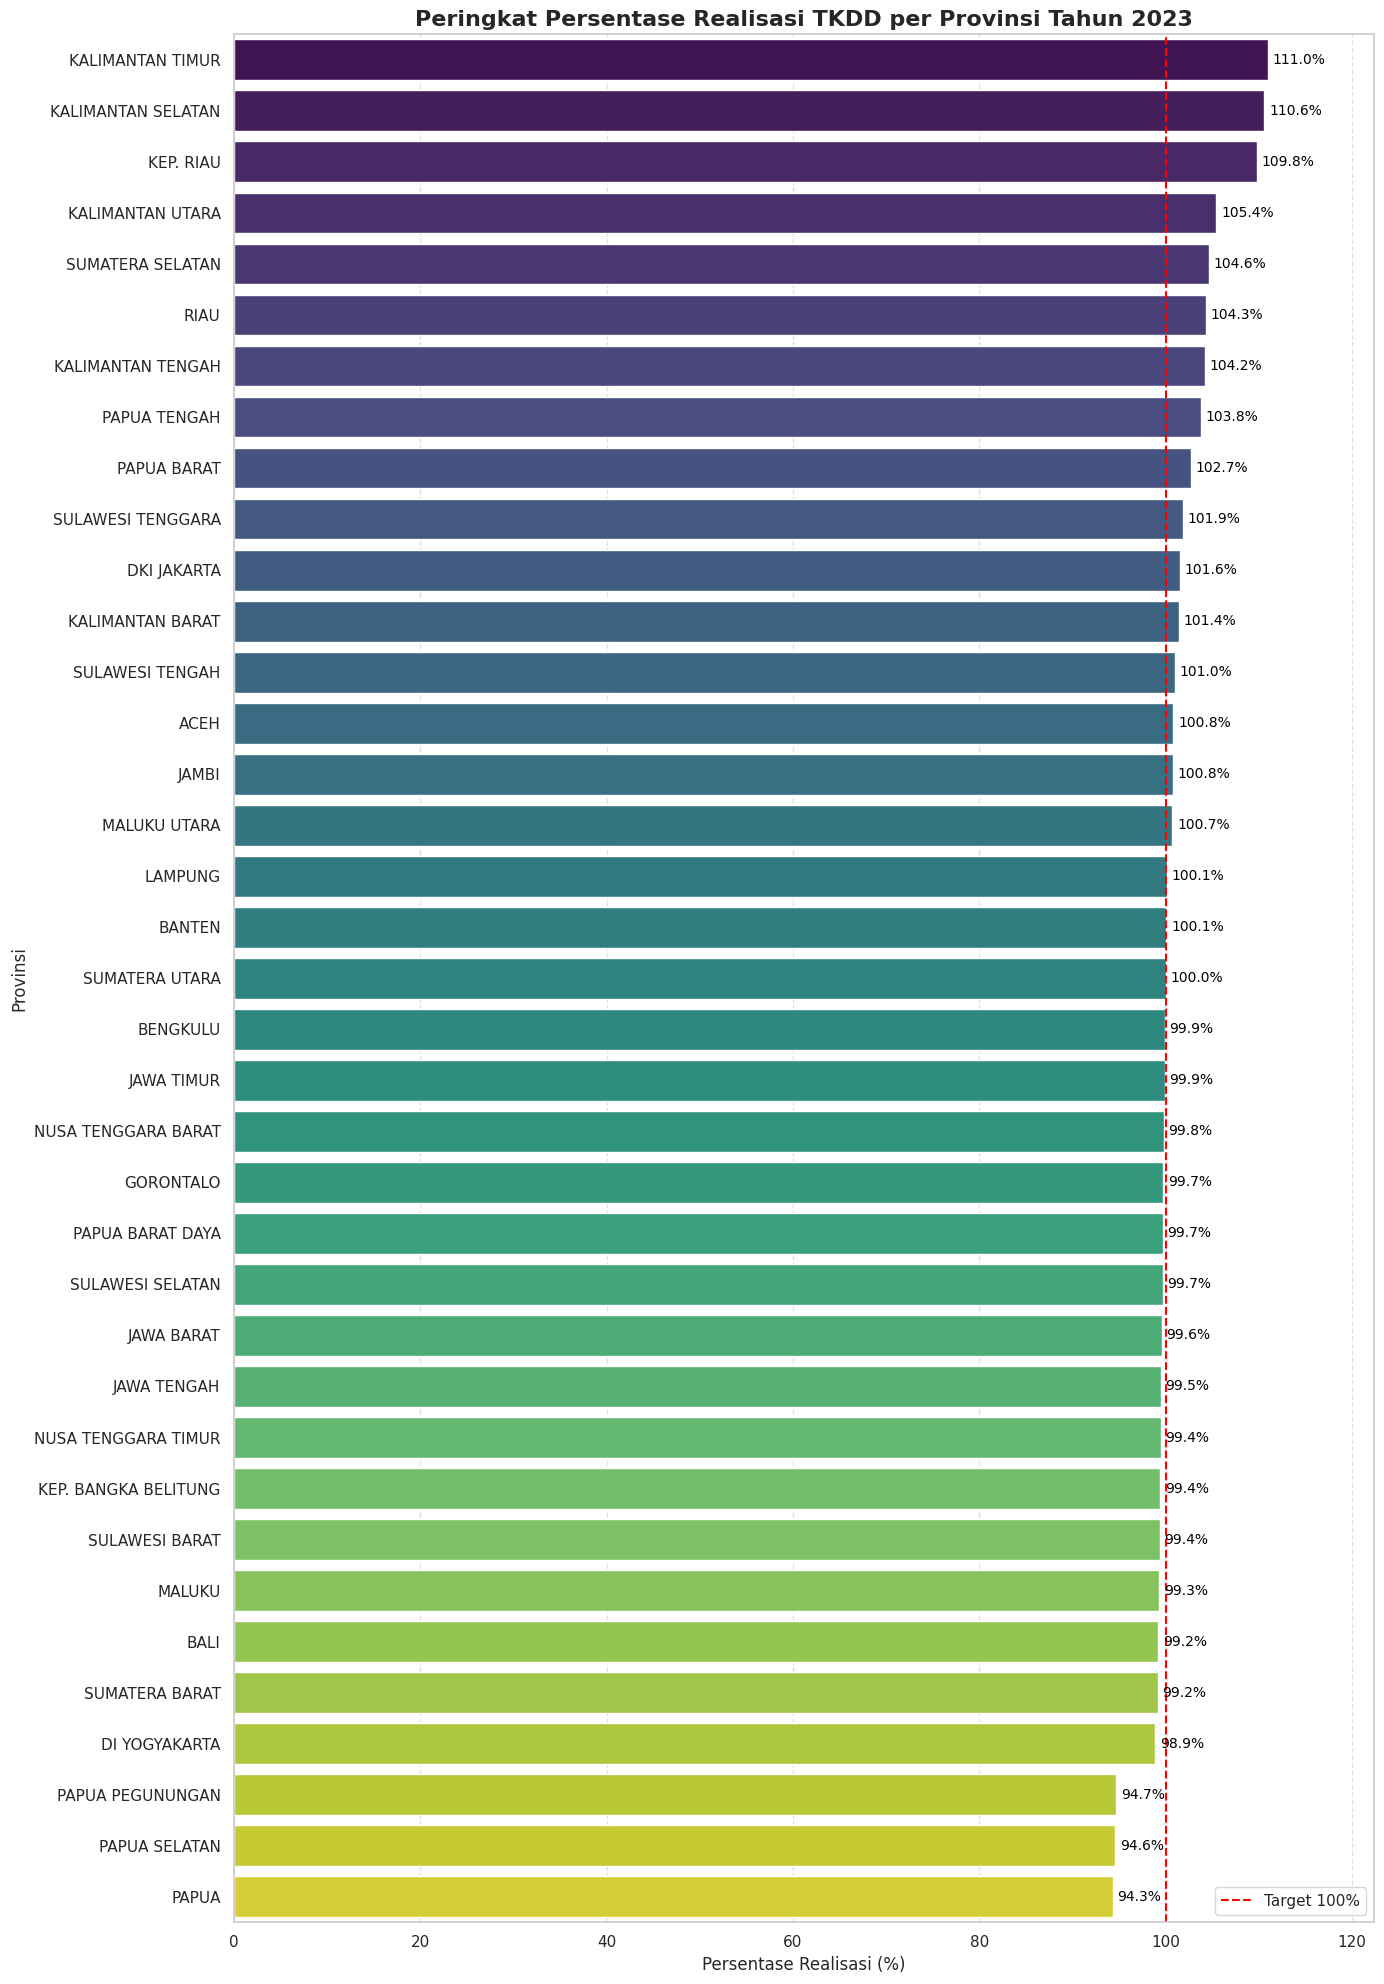

In [160]:
df_sorted = df_clean.dropna(subset=['Persentase Realisasi']).sort_values('Persentase Realisasi', ascending=False)

# Membuat visualisasi
plt.figure(figsize=(14, 20))
ax = sns.barplot(x='Persentase Realisasi', y='Provinsi', data=df_sorted, palette='viridis')

# Memberi label angka persentase pada setiap bar
for i, v in enumerate(df_sorted['Persentase Realisasi']):
    # Format teks
    label_teks = f'{v:.1f}%'
    # Posisi teks
    ax.text(v + 0.5, i, label_teks, color='black', va='center', ha='left', fontsize=10)

# Judul dan Label
plt.title('Peringkat Persentase Realisasi TKDD per Provinsi Tahun 2023', fontsize=16, fontweight='bold')
plt.xlabel('Persentase Realisasi (%)', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)

# Garis referensi 100% dan legenda
plt.axvline(100, color='red', linestyle='--', label='Target 100%')
plt.legend()

# Atur batas kanan sumbu-x agar ada ruang untuk label
ax.set_xlim(right=ax.get_xlim()[1] * 1.05)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Grafik ini menyajikan peringkat provinsi berdasarkan persentase realisasi TKDD tahun 2023. Garis merah putus-putus menunjukkan ambang target 100%.
- 19 provinsi berhasil merealisasikan anggaran di atas 100%, dipimpin oleh Kalimantan Timur (111%), Kalimantan Selatan (110,6%), dan Kepulauan Riau (109,8%).
- 15 provinsi berada sedikit di bawah 100%, namun tetap menunjukkan penyerapan yang sangat baik (di atas 94%).
- 3 provinsi di Papua yaitu Papua, Papua Selatan, dan Papua Pegunungan—memiliki tingkat realisasi di bawah 95%, menandakan potensi hambatan dalam penyaluran atau pelaksanaan anggaran.
- Sulawesi Utara tidak ditampilkan karena data realisasi tidak tersedia.

Provinsi di Kalimantan mendominasi peringkat tertinggi realisasi TKDD, menunjukkan kapasitas fiskal dan administratif yang kuat. Provinsi-provinsi di wilayah timur Indonesia, khususnya Papua, menunjukkan realisasi yang lebih rendah, yang bisa disebabkan oleh tantangan geografis, infrastruktur, atau kapasitas kelembagaan.

Secara umum, **tingkat realisasi TKDD nasional sangat baik, dengan mayoritas provinsi mencapai atau melampaui target 100%.**


**Hubungan Persentase Realisasi TKDD & IPM**

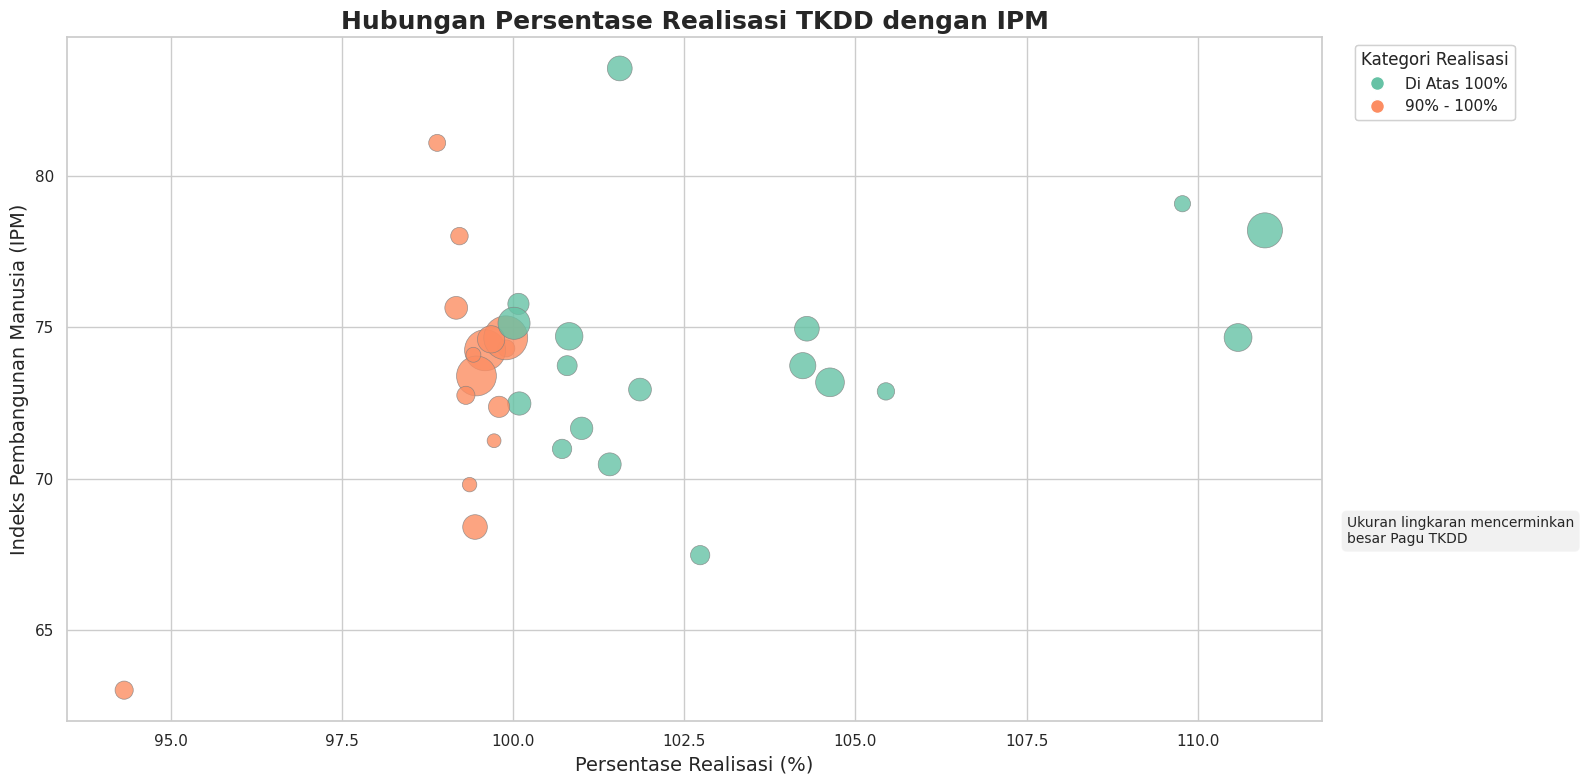

In [161]:
# Filter data
filtered_data = df_clean[df_clean['Kategori Realisasi'] != 'Data Tidak Tersedia']

# Set style
sns.set(style='whitegrid')

# Buat plot
plt.figure(figsize=(16, 8))
scatter = sns.scatterplot(
    x='Persentase Realisasi',
    y='IPM',
    data=filtered_data,
    hue='Kategori Realisasi',
    size='Pagu TKDD',
    sizes=(100, 1000),
    palette='Set2',
    alpha=0.8,
    edgecolor='gray',
    linewidth=0.5,
    legend=False  # kita akan buat legend manual
)

# Judul dan label
plt.title('Hubungan Persentase Realisasi TKDD dengan IPM', fontsize=18, weight='bold')
plt.xlabel('Persentase Realisasi (%)', fontsize=14)
plt.ylabel('Indeks Pembangunan Manusia (IPM)', fontsize=14)

# Ambil warna dari palette
palette = sns.color_palette('Set2')
kategori_unik = filtered_data['Kategori Realisasi'].unique()

# Buat legend kategori manual
kategori_handles = [
    Line2D([0], [0], marker='o', color='w', label=kategori, markerfacecolor=palette[i], markersize=10)
    for i, kategori in enumerate(kategori_unik)
]

# Legend kategori
legend_kategori = plt.legend(
    handles=kategori_handles,
    title='Kategori Realisasi',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.gca().add_artist(legend_kategori)

# Tambahkan catatan
plt.text(
    1.02, 0.3,
    'Ukuran lingkaran mencerminkan\nbesar Pagu TKDD',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgray', alpha=0.3)
)

plt.tight_layout()
plt.show()

Scatter plot ini menggambarkan hubungan antara persentase realisasi anggaran TKDD (sumbu X) dan IPM (sumbu Y) di tiap provinsi. Ukuran lingkaran mencerminkan besarnya pagu TKDD, dan warna menunjukkan kategori realisasi:

🟢 Hijau: Realisasi di atas 100%

🟠 Oranye: Realisasi antara 90%–100

- Sebagian besar provinsi dengan realisasi di atas 100% memiliki IPM yang berada di atas rata-rata nasional, namun tidak selalu yang tertinggi.
- Provinsi dengan IPM tertinggi (di atas 80) tidak selalu memiliki realisasi anggaran tertinggi, menunjukkan bahwa tingkat pembangunan manusia tidak hanya ditentukan oleh besarnya atau persentase realisasi anggaran.
- Tidak terlihat korelasi linier yang kuat antara realisasi TKDD dan IPM. Provinsi dengan realisasi tinggi bisa memiliki IPM sedang, dan sebaliknya.
- Ukuran lingkaran besar (alokasi besar) tidak selalu identik dengan IPM tinggi, menandakan bahwa efektivitas penggunaan anggaran lebih penting daripada sekadar jumlahnya.

Realisasi anggaran yang tinggi belum tentu menjamin IPM tinggi, menandakan perlunya evaluasi kualitas belanja, bukan hanya kuantitas. Provinsi dengan realisasi optimal namun IPM rendah bisa menjadi target intervensi kebijakan yang lebih terarah. Efektivitas dan fokus program pembangunan menjadi kunci dalam meningkatkan IPM, bukan hanya besarnya anggaran yang disalurkan.


###Multivariate Analysis

**Korelasi Antar Variabel**

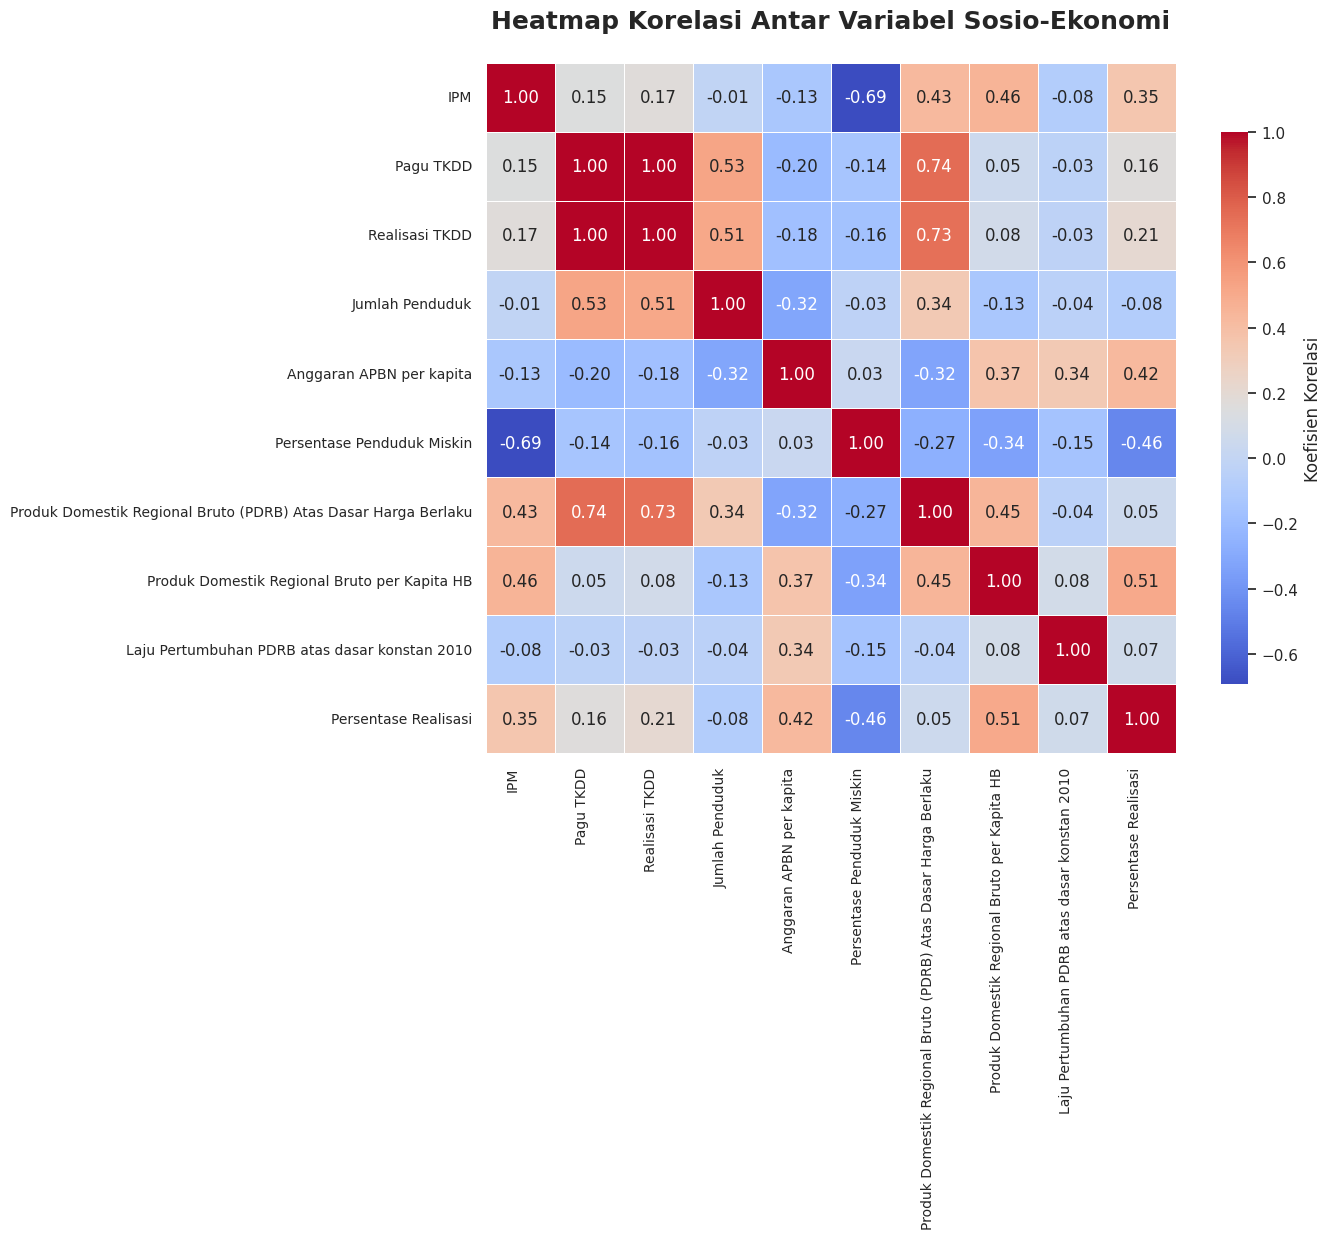

In [162]:
# Pilih kolom numerik utama
cols_for_corr = [
    'IPM',
    'Pagu TKDD',
    'Realisasi TKDD',
    'Jumlah Penduduk',
    'Anggaran APBN per kapita',
    'Persentase Penduduk Miskin',
    'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku',
    'Produk Domestik Regional Bruto per Kapita HB',
    'Laju Pertumbuhan PDRB atas dasar konstan 2010',
    'Persentase Realisasi'
]

# Hitung matriks korelasi
corr_matrix = df_clean[cols_for_corr].corr()

# Buat heatmap
plt.figure(figsize=(14, 12))
sns.set(style='white')

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Koefisien Korelasi'}
)

# Judul dan tampilan
plt.title('Heatmap Korelasi Antar Variabel Sosio-Ekonomi', fontsize=18, weight='bold', pad=25)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

Heatmap ini memvisualisasikan matriks korelasi antar indikator sosio-ekonomi dan fiskal di tingkat provinsi. Setiap sel menunjukkan nilai koefisien korelasi Pearson (−1 hingga +1), yang mengukur kekuatan dan arah hubungan linear antar variabel.
- Merah tua → Korelasi positif kuat (semakin satu variabel naik, yang lain ikut naik)
- Biru tua → Korelasi negatif kuat (semakin satu variabel naik, yang lain turun)
- Warna terang → Korelasi lemah atau tidak signifikan

1. **IPM dan Kemiskinan: Korelasi Negatif Kuat (−0.69)**
- Semakin tinggi IPM, semakin rendah persentase penduduk miskin.
- Ini menegaskan bahwa pembangunan manusia (pendidikan, kesehatan, standar hidup) sangat berperan dalam pengentasan kemiskinan.
2. **PDRB dan Alokasi Anggaran: Korelasi Positif Kuat**
- PDRB vs Pagu TKDD: 0.74
- PDRB vs Realisasi TKDD: 0.73
- Provinsi dengan output ekonomi besar cenderung menerima dan menyerap anggaran lebih tinggi. Ini bisa mencerminkan kapasitas fiskal dan administratif yang lebih kuat
3. **PDRB per Kapita dan IPM: Korelasi Positif Moderat (0.46)**
- Daerah dengan pendapatan per kapita lebih tinggi cenderung memiliki kualitas hidup (IPM) yang lebih baik.
- Namun, korelasi tidak terlalu kuat, menandakan bahwa faktor lain seperti efektivitas kebijakan sosial juga berperan.
4. **Realisasi Anggaran dan Kemiskinan: Korelasi Negatif Moderat (−0.46)**
- Semakin tinggi persentase realisasi TKDD, semakin rendah tingkat kemiskinan.
- Ini menunjukkan bahwa efektivitas penyerapan anggaran berpotensi berdampak pada kesejahteraan masyarakat, meskipun bukan satu-satunya faktor.

##Insights And Report

Tahap ini bertujuan untuk melakukan sintesis dari seluruh temuan dan secara spesifik menjawab rumusan masalah yang menjadi inti dari studi kasus ini. Dengan memanfaatkan analisis korelasi dan membandingkan berbagai variabel secara bivariat, kita akan mengidentifikasi pola, mengungkap hubungan sebab-akibat yang potensial, dan menarik wawasan (insight) strategis. Wawasan inilah yang akan menjadi fondasi bagi perumusan rekomendasi kebijakan yang berbasis bukti (evidence-based) pada Tahap selanjutnya.

### **1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?**

Berdasarkan analisis yang telah dilakukan pada data pagu dan realisasi TKDD tahun 2023, ditemukan bahwa secara umum, provinsi-provinsi di Indonesia menunjukkan tingkat penyerapan anggaran yang sangat tinggi dan efektif.

- **Mayoritas Provinsi Mencapai Target**: Dari 37 provinsi yang memiliki data (sulawesi utara data tidak tersedia), tidak ada satupun provinsi yang realisasi anggarannya di bawah 90% dari pagu yang ditetapkan.

- **Realisasi Optimal dan Melampaui Pagu**: Sebanyak 18 provinsi berhasil merealisasikan anggaran antara 90% hingga 100%, yang menunjukkan kinerja penyerapan yang optimal. Lebih impresif lagi, 19 provinsi mencatatkan realisasi di atas 100%, yang berarti penyerapan anggaran melebihi pagu yang telah dialokasikan.

- **Perbandingan Visual**: Visualisasi perbandingan pagu dan realisasi TKDD menunjukkan bahwa batang realisasi (oranye) hampir selalu sama panjang atau bahkan lebih panjang dari batang pagu (biru) di sebagian besar provinsi, mengindikasikan efektivitas penyerapan yang merata.

### **2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?**

- **Realisasi Tertinggi**: Provinsi Kalimantan Timur menempati urutan pertama dengan tingkat realisasi tertinggi, mencapai 110,98% atau 111% dari pagu anggarannya.

- **Realisasi Terendah**: Provinsi Papua memiliki tingkat realisasi terendah, meskipun masih tergolong sangat baik, yaitu sebesar 94,3%.

Fakta bahwa realisasi terendah masih di atas 90% memperkuat kesimpulan bahwa penyerapan dana TKDD di tahun 2023 secara nasional sangat efektif.

### **3. Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?**

Berdasarkan analisis korelasi melalui heatmap, faktor-faktor yang memengaruhi realisasi TKDD dapat dibedakan menjadi dua, yaitu faktor yang memengaruhi nominal realisasi dan faktor yang memengaruhi persentase realisasi.

Faktor-faktor yang memengaruhi Nominal Realisasi TKDD:

- **Pagu TKDD (Korelasi 1.00):** Terdapat hubungan positif sempurna. Ini adalah temuan yang logis, di mana semakin besar pagu anggaran yang dialokasikan, semakin besar pula nominal realisasi yang dicatatkan oleh suatu daerah.

- **PDRB atas Dasar Harga Berlaku (Korelasi 0.73):** Terdapat korelasi positif yang kuat. Provinsi dengan skala ekonomi (PDRB) yang besar cenderung memiliki kemampuan untuk merealisasikan anggaran dalam jumlah nominal yang lebih besar, kemungkinan karena didukung oleh proyek-proyek pembangunan berskala besar.

- **Jumlah Penduduk (Korelasi 0.51):** Terdapat korelasi positif yang moderat. Provinsi dengan jumlah penduduk yang lebih banyak cenderung mendapatkan alokasi dan merealisasikan anggaran nominal yang lebih tinggi untuk membiayai kebutuhan layanan publik yang lebih besar.

Faktor-faktor yang memengaruhi Persentase Realisasi TKDD:

- **PDRB per Kapita (Korelasi 0.51):** Terdapat korelasi positif yang moderat. Provinsi dengan tingkat kemakmuran per kapita yang lebih tinggi cenderung memiliki persentase realisasi yang lebih tinggi pula. Ini bisa mengindikasikan kapasitas institusional dan ekonomi yang lebih baik dalam mengelola dan membelanjakan dana.

- **Persentase Penduduk Miskin (Korelasi -0.46):** Terdapat korelasi negatif yang moderat. Ini adalah insight penting: provinsi dengan persentase penduduk miskin yang lebih tinggi justru cenderung memiliki persentase realisasi anggaran yang sedikit lebih rendah. Hal ini mungkin disebabkan oleh tantangan administratif, perencanaan, atau kapasitas implementasi program di daerah-daerah tersebut.

- **Anggaran APBN per Kapita (Korelasi 0.42):** Terdapat korelasi positif yang moderat. Daerah yang menerima dukungan fiskal lebih besar dari pusat per penduduknya cenderung lebih berhasil dalam mencapai persentase realisasi yang tinggi.

- **IPM (Korelasi 0.35):** Terdapat korelasi positif yang lemah. Provinsi dengan IPM yang lebih tinggi menunjukkan kecenderungan memiliki persentase realisasi yang sedikit lebih baik.

### **4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?**

Ya, terdapat hubungan positif, namun kekuatannya bervariasi. Berdasarkan analisis scatter plot dan nilai korelasi:

- Hubungan antara Nominal Realisasi TKDD dengan IPM menunjukkan korelasi sebesar 0.17. Ini adalah hubungan positif yang sangat lemah. Artinya, besaran nominal dana yang dibelanjakan hampir tidak memiliki pengaruh linear terhadap tinggi rendahnya IPM.

- Hubungan antara Persentase Realisasi TKDD dengan IPM menunjukkan korelasi sebesar 0.35. Ini adalah hubungan positif yang lemah. Meskipun ada kecenderungan bahwa provinsi dengan persentase penyerapan yang lebih baik memiliki IPM yang sedikit lebih tinggi, hubungan ini tidak kuat medukung pernyataan pada analisis bivariate mengenai scatter plot bahwa Provinsi dengan IPM tertinggi tidak selalu memiliki realisasi anggaran tertinggi

meskipun ada korelasi positif yang lemah, **tingkat penyerapan anggaran (baik nominal maupun persentase) bukanlah faktor utama yang menentukan keberhasilan pembangunan manusia (IPM).**

### **5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?**
Berdasarkan analisis korelasi, faktor-faktor kunci yang mempengaruhi IPM adalah sebagai berikut:

- **Persentase Penduduk Miskin (Korelasi -0.69):** Ini adalah faktor dengan pengaruh negatif terkuat. Semakin tinggi angka kemiskinan di suatu provinsi, semakin rendah tingkat pembangunan manusianya. Ini menegaskan bahwa kemiskinan adalah penghambat utama IPM.

- **PDRB per Kapita (Korelasi 0.46):** Terdapat korelasi positif yang moderat. Tingkat pendapatan per kapita yang lebih tinggi secara langsung berkontribusi pada peningkatan akses terhadap pendidikan, kesehatan, dan standar hidup layak, yang merupakan komponen utama IPM.

- **PDRB atas Dasar Harga Berlaku (Korelasi 0.43):** Terdapat korelasi positif yang moderat. Skala ekonomi regional yang besar juga menunjukkan hubungan positif dengan IPM.

- **Persentase Realisasi (Korelasi 0.35):** Seperti yang telah dibahas, persentase realisasi memiliki korelasi positif yang lemah dengan IPM. Ini menjadikannya faktor pendorong, namun bukan yang paling dominan dibandingkan faktor kemiskinan dan ekonomi.

##Rekomendasi Kebijakan

Tahap ini didedikasikan untuk mentransformasikan insight menjadi action. Berikut adalah serangkaian rekomendasi kebijakan yang dirumuskan secara strategis untuk menjawab langsung akar permasalahan yang telah teridentifikasi, dengan tujuan akhir mengarahkan belanja publik agar lebih efektif, tepat sasaran, dan pada akhirnya mampu menghasilkan dampak nyata bagi kesejahteraan masyarakat.

1. **Meningkatkan Fokus pada Kualitas dan Ketepatan Sasaran Belanja**

- **Masalah:** Analisis membuktikan bahwa hubungan antara realisasi anggaran (terutama persentase) dengan IPM hanya bersifat lemah (0.35). Artinya, sekadar menghabiskan anggaran tidak cukup.

- **Rekomendasi:** Pemerintah harus menggeser paradigma dari "seberapa banyak yang dibelanjakan" menjadi "seberapa efektif dana dibelanjakan". Alokasi dana TKDD harus secara spesifik diarahkan ke program-program yang terbukti memiliki daya ungkit tinggi terhadap komponen IPM (pendidikan, kesehatan, standar hidup).

2. **Menjadikan Pengentasan Kemiskinan sebagai Prioritas Utama dan Titik Intervensi**

- **Masalah:** Kemiskinan adalah faktor dengan korelasi negatif terkuat terhadap IPM (-0.69).

- **Rekomendasi:** Kebijakan pengentasan kemiskinan harus menjadi ujung tombak dalam strategi peningkatan IPM. Dana TKDD perlu diprioritaskan untuk program intervensi langsung seperti bantuan sosial yang akurat, pemberdayaan ekonomi bagi kelompok miskin, dan penciptaan lapangan kerja di provinsi dengan kantong-kantong kemiskinan.

3. **Memperkuat Kapasitas Daerah dengan Tingkat Kemiskinan Tinggi**

- **Masalah:** Ditemukan bahwa provinsi dengan persentase kemiskinan tinggi justru memiliki persentase realisasi yang cenderung lebih rendah (-0.46).

- **Rekomendasi:** Pemerintah pusat perlu memberikan pendampingan teknis dan penguatan kapasitas bagi pemerintah daerah dengan tingkat kemiskinan tinggi. Tujuannya adalah untuk mengatasi hambatan administratif dan perencanaan, sehingga mereka dapat lebih efektif dalam mengeksekusi program-program pengentasan kemiskinan.

4. **Mendorong Pertumbuhan Ekonomi Inklusif**

- **Masalah:** PDRB dan PDRB per kapita memiliki korelasi positif yang moderat dengan IPM (0.43 dan 0.46).

- **Rekomendasi:** Kebijakan penggunaan dana TKDD juga harus diarahkan untuk menstimulasi pertumbuhan ekonomi yang inklusif, yaitu pertumbuhan ekonomi yang dirasakan oleh seluruh lapisan masyarakat dan berkontribusi pada penurunan kemiskinan. Contohnya adalah pembangunan infrastruktur dasar yang membuka akses ekonomi bagi masyarakat miskin.

##Kesimpulan

Dari analisis komprehensif yang telah dilakukan, dapat ditarik beberapa kesimpulan kunci:

- **Penyerapan Anggaran TKDD 2023 Sangat Efektif Secara Kuantitas:** Pemerintah daerah di seluruh Indonesia menunjukkan kinerja yang sangat baik dalam merealisasikan pagu anggaran TKDD yang telah ditetapkan.

- **Korelasi Lemah antara Realisasi Anggaran dan IPM:** Ditemukan bahwa hubungan antara persentase realisasi anggaran dengan IPM bersifat positif namun lemah (0.35). Hal ini membuktikan bahwa kualitas belanja jauh lebih krusial daripada sekadar kuantitas penyerapan anggaran dalam mendorong pembangunan manusia. Keberhasilan menghabiskan dana bukanlah jaminan keberhasilan pembangunan.

- **Kemiskinan adalah Akar Masalah Pembangunan Manusia:** Faktor yang paling dominan menghambat laju IPM di Indonesia adalah tingkat kemiskinan (korelasi -0.69), diikuti oleh faktor ekonomi seperti PDRB per kapita. Ini menegaskan bahwa fokus utama setiap intervensi kebijakan harus diarahkan pada pengentasan kemiskinan.

Sebagai konklusi akhir, untuk memenangkan persaingan dalam meningkatkan kesejahteraan rakyat, **Indonesia harus beralih dari sekadar memastikan dana tersalurkan menjadi memastikan setiap rupiah yang dibelanjakan memberikan dampak maksimal dan terukur**